In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import datasets
import os

In [10]:
# Get data
data_dir = "/Users/dj/Documents/GitHub/project-neurocloud/data/golf_df.csv"

In [15]:
dat = pd.read_csv(data_dir)
dat.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [14]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [23]:
for col in dat.columns:
    dat[col] = dat[col].astype('category')

In [24]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Outlook      14 non-null     category
 1   Temperature  14 non-null     category
 2   Humidity     14 non-null     category
 3   Windy        14 non-null     category
 4   Play         14 non-null     category
dtypes: category(5)
memory usage: 834.0 bytes


In [61]:
from sklearn.tree import DecisionTreeClassifier
X = dat.iloc[:, 0:-1] # petal length and width y = iris.target
y = dat.loc[:, "Play"]
tree_clf = DecisionTreeClassifier(max_depth=4)

one_hot_data = pd.get_dummies(dat[['Outlook', 'Temperature', 'Humidity', 'Windy']],drop_first=True)
tree_clf.fit(one_hot_data, dat['Play'])



DecisionTreeClassifier(max_depth=4)

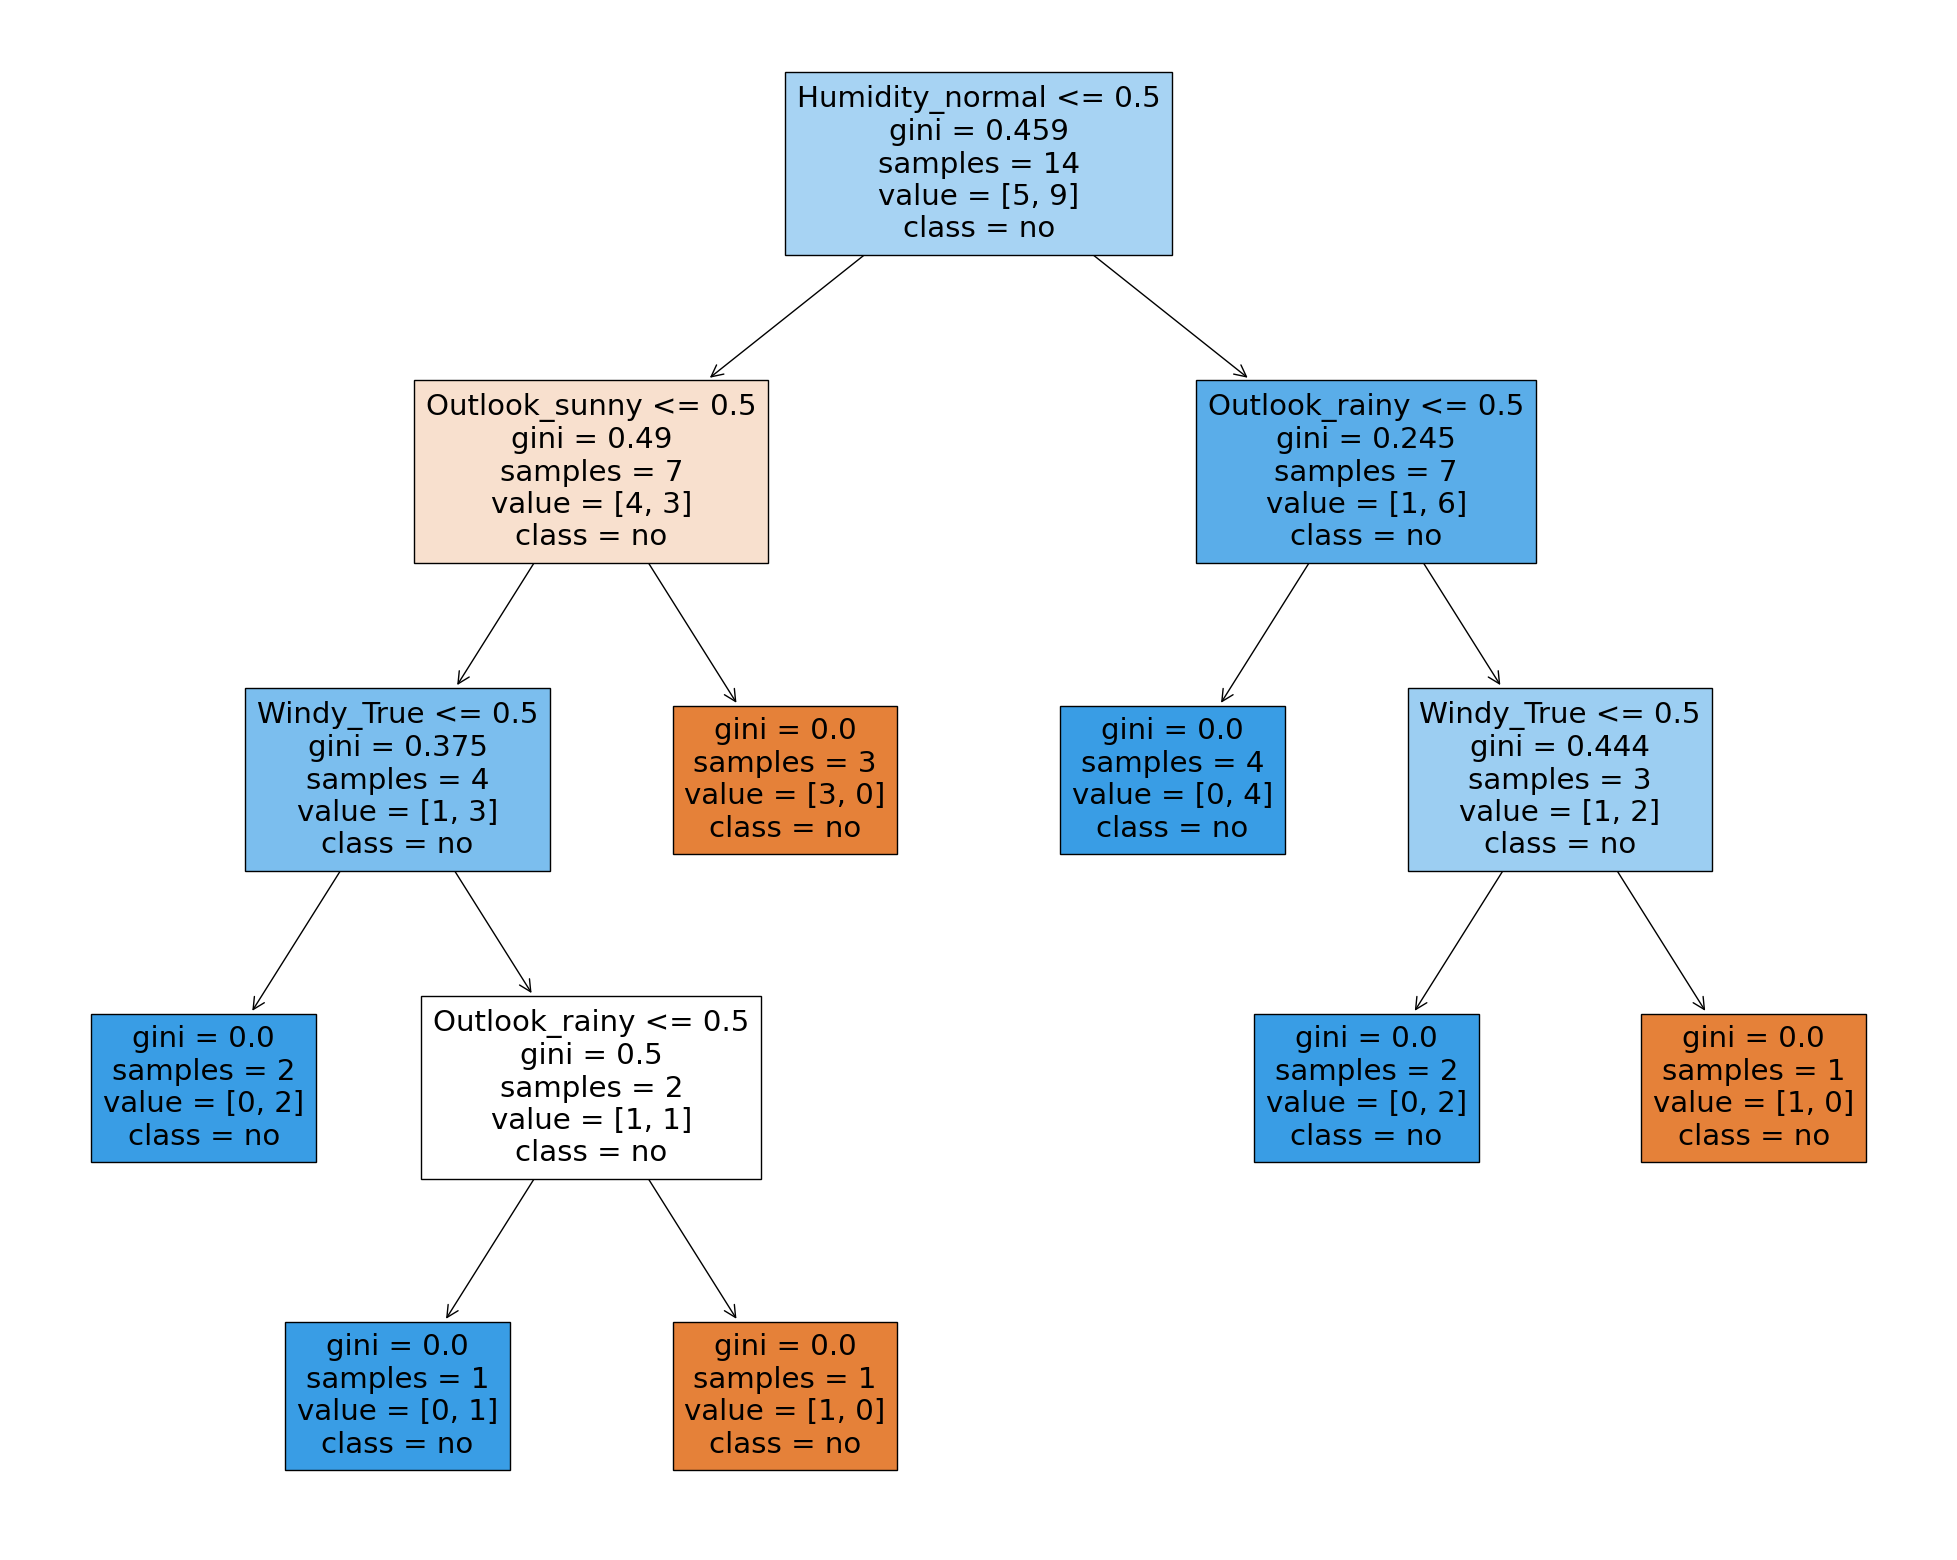

In [62]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=list(one_hot_data.columns),  
                   class_names=np.array(dat['Play']),
                   filled=True)